Mehwish Shabir

Reg no: 450341

LAB_TASK_4

Introductory sentiment analysis using LSTM on IMBD Dataset

In [24]:
# Import necessary libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from sklearn.metrics import confusion_matrix,f1_score,precision_score,recall_score

In [7]:
#Load IMDb dataset
(X_train, y_train),(X_test, y_test)= imdb.load_data(num_words=10000)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [8]:
# Example showing how to access reviews and labels
print("Review (as indices):", X_train[100])
print("Label:", y_train[100])

Review (as indices): [1, 13, 244, 6, 87, 337, 7, 628, 2219, 5, 28, 285, 15, 240, 93, 23, 288, 549, 18, 1455, 673, 4, 241, 534, 3635, 8448, 20, 38, 54, 13, 258, 46, 44, 14, 13, 1241, 7258, 12, 5, 5, 51, 9, 14, 45, 6, 762, 7, 2, 1309, 328, 5, 428, 2473, 15, 26, 1292, 5, 3939, 6728, 5, 1960, 279, 13, 92, 124, 803, 52, 21, 279, 14, 9, 43, 6, 762, 7, 595, 15, 16, 2, 23, 4, 1071, 467, 4, 403, 7, 628, 2219, 8, 97, 6, 171, 3596, 99, 387, 72, 97, 12, 788, 15, 13, 161, 459, 44, 4, 3939, 1101, 173, 21, 69, 8, 401, 2, 4, 481, 88, 61, 4731, 238, 28, 32, 11, 32, 14, 9, 6, 545, 1332, 766, 5, 203, 73, 28, 43, 77, 317, 11, 4, 2, 953, 270, 17, 6, 3616, 13, 545, 386, 25, 92, 1142, 129, 278, 23, 14, 241, 46, 7, 158]
Label: 0


In [9]:
# You can convert the indices back to words using the word_index dictionary
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in
word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?')
for i in X_train[0]])
print("\nDecoded Review:", decoded_review)

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

Decoded Review: ? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are a

In [14]:
# Preprocess the data
X_train = pad_sequences(X_train, maxlen=100)
X_test = pad_sequences(X_test, maxlen=100)

In [26]:

# Define the model
model = Sequential([
    Embedding(input_dim=10000, output_dim=32,
input_length=100),
    LSTM(64),
    Dense(1, activation='sigmoid')
])

#Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy',
metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [16]:

# Train the model
model.fit(X_train, y_train, epochs=15, batch_size=32,
validation_data=(X_test, y_test))

Epoch 1/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 57s 70ms/step - accuracy: 0.7268 - loss: 0.5116 - val_accuracy: 0.8512 - val_loss: 0.3394
Epoch 2/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 62s 79ms/step - accuracy: 0.8934 - loss: 0.2624 - val_accuracy: 0.8514 - val_loss: 0.3546
Epoch 3/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 74s 69ms/step - accuracy: 0.9254 - loss: 0.1997 - val_accuracy: 0.8417 - val_loss: 0.3979
Epoch 4/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 53s 68ms/step - accuracy: 0.9489 - loss: 0.1401 - val_accuracy: 0.8370 - val_loss: 0.4856
Epoch 5/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 70ms/step - accuracy: 0.9609 - loss: 0.1096 - val_accuracy: 0.8272 - val_loss: 0.4832
Epoch 6/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 53s 68ms/step - accuracy: 0.9708 - loss: 0.0837 - val_accuracy: 0.8333 - val_loss: 0.5519
Epoch 7/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 68ms/step - accuracy: 0.9818 - loss: 0.0593 - val_accuracy: 0.8239 - val_loss: 0.6353
Epoch 8/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 68ms/step - accuracy: 0.9845 - loss: 0.0562 - 

In [27]:
from tensorflow.keras.callbacks import EarlyStopping

# Define EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# Train the model
history = model.fit(
    X_train,
    y_train,
    epochs=30,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping]
)


Epoch 1/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 55s 68ms/step - accuracy: 0.7355 - loss: 0.5049 - val_accuracy: 0.8512 - val_loss: 0.3429
Epoch 2/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 53s 68ms/step - accuracy: 0.8998 - loss: 0.2561 - val_accuracy: 0.8401 - val_loss: 0.3742
Epoch 3/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 62s 79ms/step - accuracy: 0.9272 - loss: 0.1961 - val_accuracy: 0.8457 - val_loss: 0.3601
Epoch 4/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 74s 69ms/step - accuracy: 0.9476 - loss: 0.1455 - val_accuracy: 0.8385 - val_loss: 0.4539


In [18]:
y_pred_proba = model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype('int32')
print("Predictions generated and converted to binary labels.")

782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step
Predictions generated and converted to binary labels.


In [28]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)
y_pred = model.predict(X_test)
y_predict = [1 if o > 0.5 else 0 for o in y_pred]
cf_matrix =confusion_matrix(y_test,y_predict)
tn, fp, fn, tp = confusion_matrix(y_test,y_predict).ravel()
print("Precision: {:.2f}%".format(100 *
precision_score(y_test, y_predict)))
print("Recall: {:.2f}%".format(100 * recall_score(y_test,
y_predict)))
print("F1 Score: {:.2f}%".format(100 *
f1_score(y_test,y_predict)))

782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.8491 - loss: 0.3445
Test accuracy: 0.8511599898338318
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step
Precision: 86.18%
Recall: 83.65%
F1 Score: 84.89%


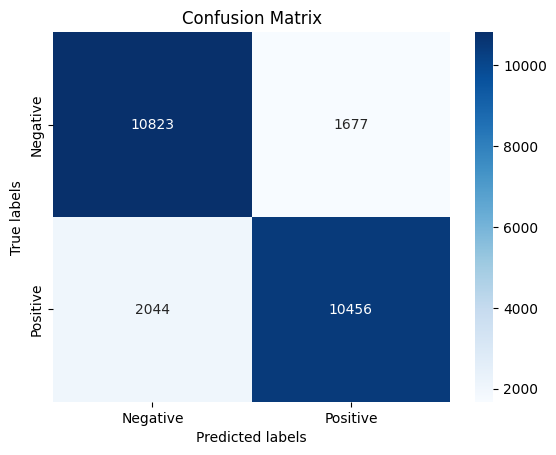

In [29]:
# Plot results of the confusion matrix
ax= plt.subplot()
sns.heatmap(cf_matrix, annot=True, ax =
ax,cmap='Blues',fmt='');
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['Negative', 'Positive']);
ax.yaxis.set_ticklabels(['Negative', 'Positive']);

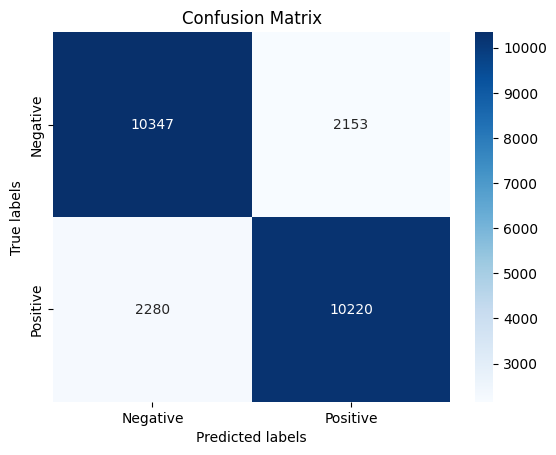

In [22]:
# Plot results of the confusion matrix
ax= plt.subplot()
sns.heatmap(cf_matrix, annot=True, ax =
ax,cmap='Blues',fmt='');
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['Negative', 'Positive']);
ax.yaxis.set_ticklabels(['Negative', 'Positive']);

In [30]:
import numpy as np
import pandas as pd

# Select 5 random indices from the test dataset
sample_indices = np.random.choice(len(X_test), 5, replace=False)

records = []

for idx in sample_indices:
    # Get numerical review and labels
    numerical_review = X_test[idx]
    actual_label = y_test[idx]
    predicted_label = int(y_pred[idx][0] > 0.5)

    # Decode the review
    decoded_review = ' '.join(
        [reverse_word_index.get(word_id - 3, '?')
         for word_id in numerical_review if word_id > 0]
    )

    records.append({
        "Review": decoded_review,
        "Actual Sentiment": "Positive" if actual_label == 1 else "Negative",
        "Predicted Sentiment": "Positive" if predicted_label == 1 else "Negative"
    })

# Create DataFrame
df_predictions = pd.DataFrame(records)

# Display DataFrame
df_predictions


,Review,Actual Sentiment,Predicted Sentiment
0,? but interesting and it was all downhill from...,Positive,Negative
1,it then there is richard ? playing james ? fro...,Negative,Negative
2,poor attempt at a commercial soundtrack that w...,Negative,Negative
3,of the hit man the idea of jodie running off w...,Negative,Negative
4,from beginning to end but develops ? as ? ? wi...,Positive,Positive
